<a href="https://colab.research.google.com/github/evgeny-kolonsky/lab1m/blob/main/collision/sphere_collision_sliding_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Collision of Two Identical Spheres with Normal Restitution and Sliding (Coulomb) Friction at Contact

This notebook documents a **minimal impulsive collision model** for two identical spheres colliding at low speed.

## Coordinate system

Coordinate system
- $Ox$ — along the initial velocity of body 1.
- $Oy$ — in the horizontal plane, perpendicular to $Ox$
- $Oz$ - vertical, perpendicular to the plane of motion $(x, y)$

Positive angles direction: rotation from $x$ to $y$, counterclockwise.

## Model assumptions
- Two identical spheres: mass $m$, radius $R$, moment of inertia $I=\frac{2}{5}mR^2$ (uniform solid sphere).
- Sphere **2** is initially at rest: $\vec v_{20}=0$, $\vec\omega_{20}=0$.
- Sphere **1** has initial translational velocity $\vec v_{10}=(v_0,0,0)$.
- Sphere **1** has initial rolling  $\vec \omega_{10}=(0, \frac{v_0}{R},0)$.
- Impact occurs when the line of centers makes angle $\alpha$ with the $x$-axis.
- Geometry of impact:
  - vector $\vec n = (\cos\alpha, \sin\alpha, 0) $ is directed from the center of sphere 1 to the center of sphere 2.
  - vector $\vec t = (-\sin\alpha, \cos\alpha, 0)$ is perpendicular to $\vec n$ in the plane of motion $(x,y)$
- **Impact** is described by impulse $\vec J$
$$
\vec J = \int_\textrm{contact time} \vec F_{\textrm{contact}} dt,
$$
We decompose the impulse transmitted during the short collision as
$$
\vec J = J_n\,\vec n + J_t\,\vec t + J_z\,\vec z.
$$
We adopt the **convention: sphere 2 receives $+\vec J$ and sphere 1 receives $-\vec J$**.
- **Normal restitution** (not necessarily perfectly elastic) with coefficient $e\in[0,1]$. Ideal elastic case $e=1$, ideal inelastic $e=0$.


- **Sliding friction at contact (Coulomb, kinetic)**: the tangential impulse $J\perp \equiv J - J_n$ magnitude satisfies $$|J_{\perp}|= \mu J_n,$$ and direction opposes the initial tangential slip. Slip is described by relative velocity $\vec g_{\perp}$ at contact point. Symbol $\perp$ denotes plane $(t,z)$ normal to vector $\vec n$.
- In this notebook we use  billiard-type approximation for planar scattering: the motion is in $(x,y)$ plane, motion in $z$-axis is prohibited.





## Geometry and unit vectors
At the instant of impact, define the unit normal along the line of centers:
$$
\vec n = (\cos\alpha,\ \sin\alpha,\ 0).
$$
Choose an in-plane tangential unit vector orthogonal to $\vec n$:
$$
\vec t = (-\sin\alpha,\ \cos\alpha,\ 0),\qquad \vec t\cdot\vec n=0.
$$






## Linear impulse–momentum (translation)
Impulse - velocity relations:
$$
m(\vec v_1-\vec v_{10}) = -\vec J,\\
m(\vec v_2-\vec v_{20}) = +\vec J.
\tag{1}
$$
Total linear momentum is conserved automatically:
$$
m\vec v_{10} + m\vec v_{20} = m\vec v_1 + m\vec v_2.
$$


# Angular impulse-momentum

Total angular momentum relative to point $O$ is sum of orbital momentum $L_{orb} = {r} \times m v$ and spin angular momentum $L_{spin} = I \omega$.

Let's take $O$ - center of mass.
$$
L_O = r_1 \times m v_1 + r_2 \times m v_2 + I\omega_1 + I\omega_2
$$
External moments are negligible for the time of collision, hence
$$
\Delta L_O = 0.
$$
## Orbital moments
Impulses:
$$
\Delta (m v_1) = - J, \quad \Delta (m v_2) = +J.
$$
Orbital angular momentum:
$$
\Delta L_{orb} = r_1 \times \Delta(m v_1) + r_2 \times \Delta(m v_2) = (r_2 - r_2) \times J.
$$
Here $r_2 - r_1$ is a vector from center 1 to center 2. At the time of contact it's length is $R_1+R_2 = 2R$, direction $n$.

Therefore
$$
\Delta L_{orb} = 2 R n \times J.
$$
## Spin moments
$$
\Delta I \omega_1 = - R \vec n \times \vec J,\\
\Delta I \omega_2 = - R \vec n \times \vec J,\\
\Delta L_{spin} = \Delta I \omega_1 + \Delta I \omega_2 = -2 R n \times J
$$

## Total angular momentum
$$
\Delta L_O = \Delta L_{orb} + \Delta L_{spin} = 0
$$


## Normal restitution law and the normal impulse $J_n$
The relative normal velocity (of the centers) along $\vec n$ changes according to
$$
(\vec v_1-\vec v_2)\cdot\vec n = -e\,(\vec v_{10}-\vec v_{20})\cdot\vec n.
\tag{2}
$$
Using (1), (2), and noting $\vec J\cdot\vec n=J_n$, we obtain:
$$
\boxed{\ J_n = \frac{m}{2}(1+e)\,(\vec v_{10}-\vec v_{20}) \cdot\vec n\ }.
\tag{3}
$$



## Coulomb sliding (kinetic) friction: tangential impulse $J_\perp$

Tangential impulse
$$
J_\perp = J - J_n n = J_t t + J_z z.
$$

In the **sliding** regime the tangential impulse magnitude satisfies
$$
|J_\perp| = \mu J_n.
$$

The sliding regime is defined by relative velocity in contact point:
$$
\vec v_{c1} = \vec v_1 + \vec \omega_1 \times (R \vec n), \\
\vec v_{c2} = \vec v_2 + \vec \omega_2 \times (-R \vec n),\\
\vec g \equiv \vec v_{c1} - \vec v_{c2}
$$

Normal component of relative velocity $g_n$ and elastity value $e$ define normal component of collision impulse $J_n$.

Tangential component of relative velocity $\vec g_\perp = \vec g - g_n \vec n$ and friction coefficent $\mu$ define drag impulse acting on ball 2, in direction of body 1 tangential velocity:
$$
\ J_\perp = \mu J_n  \frac{g_\perp}{|g_\perp|} \quad \textrm{when} \quad g_\perp \neq 0.
$$




## Spin update
If  include tangential impulse about the sphere centers, the spin changes as
$$
I(\vec\omega_1-\vec\omega_{10}) = R\,\vec n\times(J_t\vec t),\qquad
I(\vec\omega_2-\vec\omega_{20}) = R\,\vec n\times(J_t\vec t).
$$

For identical uniform spheres $I=\frac{2}{5}mR^2$ this gives an out-of-plane spin component proportional to $J_t$.

$$
\Delta \vec \omega_1 = \Delta \vec \omega_2 = \frac{R}{I} J_t (\vec n \times \vec t) = - \frac{R}{I} J_t \vec z
$$
Hence
$$
\omega_1 = \omega_{10} + \Delta \omega_1 = (0, \frac{v_0}{R}, -\frac{R}{I} J_t)
$$
and
$$
\omega_2 =  \Delta \omega_2 = (0, 0, -\frac{R}{I} J_t)
$$
After collision second spehre starts to move slipping without rolling, having only spin in z-direction. Then due to friction between surface and sphere  starts rolling.


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [53]:
# function do keep velocity vector in (x,y) plane
def dropz(vector):
  return vector * np.array([1, 1, 0])

def angle(a, b):
  # suggested that vectors are lying in plane(xy)
  # angle is defined with sign: when rot(a, b) aligned with z, the angle is positive
  # when aligned with -z - negative

  cs = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
  sign = np.sign( np.cross(a, b) @ z)
  return sign * np.arccos(cs) * 180 / np.pi

# test

# x y z axis unit vectors
x = np.array([1,0,0])
y = np.array([0,1,0])
z = np.array([0,0,1])

# test
alpha_deg = 20
a = np.deg2rad(alpha_deg)

c, s = np.cos(a), np.sin(a)
rotation_matrix = np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])

n = rotation_matrix @ x
t = rotation_matrix @ y

ans = angle(x, n)
print(f'{ans = }')



ans = np.float64(19.999999999999993)


In [97]:
v0 =1
R = 1
m = 1
w0 = v0 / R
V10 = np.array([v0, 0, 0])
W10 = np.array([0, w0, 0])
V20 = np.array([0, 0, 0])
W20 = np.array([0, 0, 0])

# Scattering angle

In [129]:
def scattering_angle(alpha_deg, mu, e):
  a = np.deg2rad(alpha_deg)
  c, s = np.cos(a), np.sin(a)
  rotation_matrix = np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])

  n = rotation_matrix @ x
  t = rotation_matrix @ y

  # Contact point velocity
  VC1 = V10 + np.cross(W10, R * n)
  VC2 = V20 + np.cross(W20, -R * n)
  # Relative velocity at contact point
  G = VC1 - VC2
  # vector - Component of G in n direction
  Gn = (G @ n) * n
  # vector - component of G in tz plane (perpendicular to n)
  Gtz = G - Gn

  # normal impulse
  Jn = m / 2 * (1 + e) * Gn

  # Slipping impulse in drag direction
  if np.linalg.norm(Gtz) > 0:
    Jtz =  mu * np.linalg.norm(Jn) * Gtz / np.linalg.norm(Gtz)
  else:
    Jtz = np.array([0,0,0])

  Jt = (Jtz @t ) * t

  J = Jn + Jt
  # Velocity after impact
  V1 = V10 - J / m
  V2 = V20 + J / m

  # return to plane
  V1 = dropz(V1)
  V2 = dropz(V2)

  # find angles
  th1 = angle(x, V1)
  th2 = angle(x, V2)
  th = angle(V1, V2)
  return th, th1, th2

# test

V10 = np.array([v0, 0, 0])
W10 = np.array([0, w0, 0.8])
V20 = np.array([0, 0, 0])
W20 = np.array([0, 0, 0])

#for a in [0, 20, 30, 45, 60, 90]:
#    th, th1, th2 = scattering_angle(a, mu=0.4, e=0.95)
#    print(f'θ: {th:7>.0f} θ1: {th1:7>.0f} θ2: {th2:7>.0f}')


for mu in  [0, 0.1, 0.2, 0.4]:
    a = 45
    th, th1, th2 = scattering_angle(a, mu=mu, e=0.95)
    print(f' {mu=:>7.1f} θ: {th:7>.0f} θ1: {th1:7>.0f} θ2: {th2:7>.0f}')

#for e in  [1.0, 0.95, 0.9]:
#    a = 45
#    mu = 0.2
#    th, th1, th2 = scattering_angle(a, mu=mu, e=e)
#    print(f' {e=:>7.1f} θ: {th:7>.0f} θ1: {th1:7>.0f} θ2: {th2:7>.0f}')



 mu=    0.0 θ: 89 θ1: -44 θ2: 45
 mu=    0.1 θ: 89 θ1: -44 θ2: 46
 mu=    0.2 θ: 90 θ1: -44 θ2: 46
 mu=    0.4 θ: 92 θ1: -44 θ2: 48


# Graph

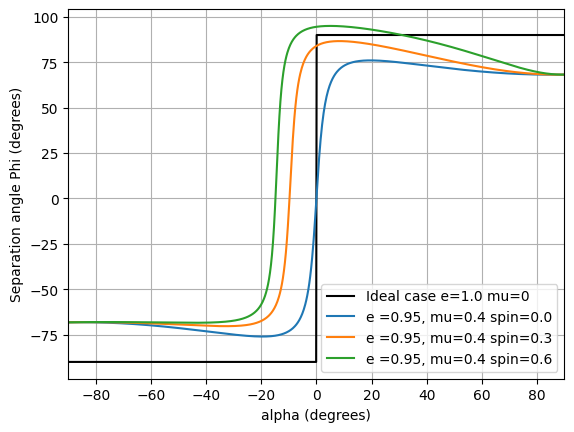

In [164]:
v0 =1
R = 1
m = 1
roll = v0 / R
spin = 0.
V10 = np.array([v0, 0, 0])
W10 = np.array([0, roll, spin])
V20 = np.array([0, 0, 0])
W20 = np.array([0, 0, 0])

alphas_deg = np.linspace(-90, 90, 1000)


def Phi_curve(mu, e):
  Phi = np.array([scattering_angle(a, mu, e) for a in alphas_deg])
  return Phi

mu, e = 0, 1.0
Phi = Phi_curve(mu, e)
th, th1, th2 = Phi.T
plt.plot(alphas_deg, th, color='black', label=f'Ideal case {e=} {mu=}')

e = 0.95
mu = 0.4
for spin in [0.,  0.3,   0.6]:
  W10 = np.array([0, roll, spin])
  Phi = Phi_curve(mu, e)
  th, th1, th2 = Phi.T
  plt.plot(alphas_deg, th, label=f'{e =}, {mu=} {spin=}')




plt.xlabel('alpha (degrees)')
plt.ylabel('Separation angle Phi (degrees)')
plt.grid(True)
plt.legend()
#plt.ylim(0, 100)
plt.xlim(-90, 90)
plt.legend(loc='lower right')
#plt.axis('equal')
plt.show()
